# Работа с временными рядами и датами в pandas на каком-нибудь примере	

### Филиппова А. Д. НПМбд-01-20

### Временной ряд (time series) — это данные, последовательно собранные в регулярные промежутки времени.

In [637]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

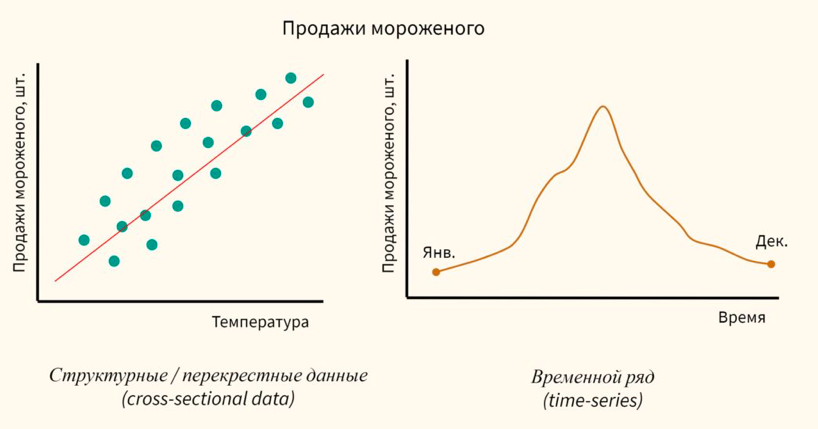

In [639]:
display(Image(filename='Продажи мороженного.png', width = 2000))

### Основное отличие: перекрестные данные предполагают независимость наблюдений, во временных рядах будущее зависит от прошлого.

### В качестве базы данных возьмем цену на акции Apple за пять лет по дням.

In [640]:
cost = pd.read_csv("apple.csv")
cost = cost.drop(columns='Volume') 
cost = cost.drop(columns='Adj Close') 
cost

,Date,Open,High,Low,Close
0,2017-02-22,136.429993,137.119995,136.110001,137.110001
1,2017-02-21,136.229996,136.750000,135.979996,136.699997
2,2017-02-17,135.100006,135.830002,135.100006,135.720001
3,2017-02-16,135.669998,135.899994,134.839996,135.350006
4,2017-02-15,135.520004,136.270004,134.619995,135.509995
...,...,...,...,...,...
1253,2012-02-29,541.560005,547.610023,535.700005,542.440025
1254,2012-02-28,527.960014,535.410011,525.850006,535.410011
1255,2012-02-27,521.309982,528.500000,516.280014,525.760017
1256,2012-02-24,519.669998,522.899979,518.640015,522.409981


In [641]:
#cost['2017-08-03':'2017-09-01']

In [642]:
type(cost.Date[0])

str

### Попробуем взять срез данных за определенный промежуток времени, код выдаст ошибку, так как чаще всего временные ряды поступают в строковом формате.

## Использование правильного формата

In [643]:
cost.set_index('Date', inplace = True)

In [644]:
cost

,Open,High,Low,Close
Date,,,,
2017-02-22,136.429993,137.119995,136.110001,137.110001
2017-02-21,136.229996,136.750000,135.979996,136.699997
2017-02-17,135.100006,135.830002,135.100006,135.720001
2017-02-16,135.669998,135.899994,134.839996,135.350006
2017-02-15,135.520004,136.270004,134.619995,135.509995
...,...,...,...,...
2012-02-29,541.560005,547.610023,535.700005,542.440025
2012-02-28,527.960014,535.410011,525.850006,535.410011
2012-02-27,521.309982,528.500000,516.280014,525.760017


### Сделаем дату индексом строки. Теперь за идентификацию строк отвечает столбец Date.

In [645]:
cost.index = pd.to_datetime(cost.index)
cost.index

DatetimeIndex(['2017-02-22', '2017-02-21', '2017-02-17', '2017-02-16',
               '2017-02-15', '2017-02-14', '2017-02-13', '2017-02-10',
               '2017-02-09', '2017-02-08',
               ...
               '2012-03-07', '2012-03-06', '2012-03-05', '2012-03-02',
               '2012-03-01', '2012-02-29', '2012-02-28', '2012-02-27',
               '2012-02-24', '2012-02-23'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

### Преобразуем дату в специальный объект datetime.

In [646]:
cost = cost.sort_index()
cost

,Open,High,Low,Close
Date,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977
2012-02-24,519.669998,522.899979,518.640015,522.409981
2012-02-27,521.309982,528.500000,516.280014,525.760017
2012-02-28,527.960014,535.410011,525.850006,535.410011
2012-02-29,541.560005,547.610023,535.700005,542.440025
...,...,...,...,...
2017-02-15,135.520004,136.270004,134.619995,135.509995
2017-02-16,135.669998,135.899994,134.839996,135.350006
2017-02-17,135.100006,135.830002,135.100006,135.720001


## Формирование новой выборки


In [647]:
cost['2015-08-29':'2015-09-01']

,Open,High,Low,Close
Date,,,,
2015-08-31,112.029999,114.529999,112.000000,112.760002
2015-09-01,110.150002,111.879997,107.360001,107.720001


### Благодаря тому  что мы преобразовали дату в нужный формат и отсортировали по времени, теперь можно брать срезы по датам.

In [648]:
cost.loc['2015-05'].Open.mean()

128.70750080000002

### Найдём среднее значение начальной цены акции в мае 2015 года.

In [649]:
cost.loc['2015-05-26']

Open     132.600006
High     132.910004
Low      129.119995
Close    129.619995
Name: 2015-05-26 00:00:00, dtype: float64

### Таким же способом мы можем получить данные для конкретной даты.

### Мы также можем рассчитать интересующие нас показатели по годам. Например, среднегодовое значение финальной стоимости акции:

In [650]:
cost.Close.resample('Y').mean().reset_index()

,Date,Close
0,2012-12-31,595.962139
1,2013-12-31,472.634880
2,2014-12-31,295.402342
3,2015-12-31,120.040000
4,2016-12-31,104.604008
5,2017-12-31,125.281713


### В данном случае, с помощью функции resample мы сформировали новую выборку — теперь наши данные агрегированы по годам.

<AxesSubplot:xlabel='Date'>

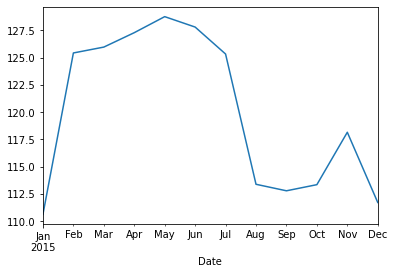

In [651]:
cost['2015-01-01':'2015-12-31'].Close.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

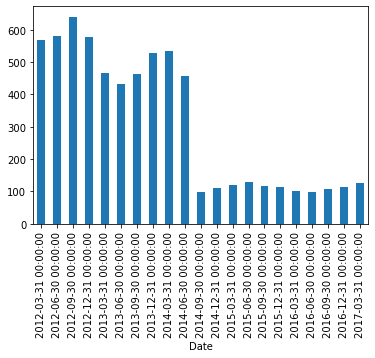

In [652]:
cost.Close.resample('Q').mean().plot(kind='bar')

In [653]:
cost1 = pd.DataFrame(cost['Open'])
cost1

,Open
Date,
2012-02-23,515.079987
2012-02-24,519.669998
2012-02-27,521.309982
2012-02-28,527.960014
2012-02-29,541.560005
...,...
2017-02-15,135.520004
2017-02-16,135.669998
2017-02-17,135.100006


### Создадим базу данных, которая содержит только значения первоначальной стоимости акции.

## shift()

### Функция shift сдвигает данные указанное количество раз. 

In [654]:
cost1.shift(1)

,Open
Date,
2012-02-23,NaN
2012-02-24,515.079987
2012-02-27,519.669998
2012-02-28,521.309982
2012-02-29,527.960014
...,...
2017-02-15,133.470001
2017-02-16,135.520004
2017-02-17,135.669998


### Сдвигаем наши данные на 1. Первая строка имеет нулевое значение, потому что ее значение переходит во вторую. При этом количество строк в таблице не меняется. Если использовать отрицательное значение в shift, то данные сместятся в обратную сторону.

In [655]:
cost1['Prey Day Opening'] = cost1.shift(1)
cost1

,Open,Prey Day Opening
Date,,
2012-02-23,515.079987,NaN
2012-02-24,519.669998,515.079987
2012-02-27,521.309982,519.669998
2012-02-28,527.960014,521.309982
2012-02-29,541.560005,527.960014
...,...,...
2017-02-15,135.520004,133.470001
2017-02-16,135.669998,135.520004
2017-02-17,135.100006,135.669998


### Таким образом, функция shift дает данные за предыдущий или следующий период. Так сравнивать гораздо удобнее.

In [656]:
cost1['1 day change'] = cost1['Open'] - cost1['Prey Day Opening']
cost1

,Open,Prey Day Opening,1 day change
Date,,,
2012-02-23,515.079987,NaN,NaN
2012-02-24,519.669998,515.079987,4.590011
2012-02-27,521.309982,519.669998,1.639984
2012-02-28,527.960014,521.309982,6.650032
2012-02-29,541.560005,527.960014,13.599991
...,...,...,...
2017-02-15,135.520004,133.470001,2.050003
2017-02-16,135.669998,135.520004,0.149994
2017-02-17,135.100006,135.669998,-0.569992


### Мы можем посчитать изменение цены за один период.

## Rolling

### Мы также можем рассчитать скользящее среднее (moving average, rolling average) за n предыдущих периодов. Вначале посмотрим, что это такое.

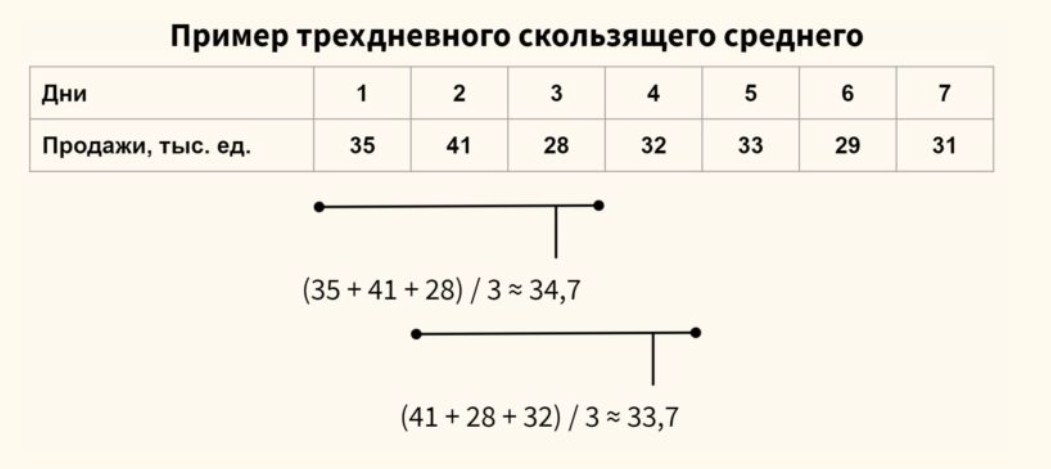

In [657]:
display(Image(filename='Скользящее среднее.png', width = 2000))

### Функция rolling агрегирует данные за указанное количество промежутков времени. Например, среднее значение за каждые три дня. Период, за который рассчитывается скользящее среднее, также называется окном (window).

In [658]:
cost_rolling = cost[['Low','High']]
cost_rolling.rolling(window = 3).mean().head()

,Low,High
Date,,
2012-02-23,NaN,NaN
2012-02-24,NaN,NaN
2012-02-27,514.806674,523.076663
2012-02-28,520.256678,528.936663
2012-02-29,525.943342,537.173345


### Прописанная функция считает среднее значение наименьшей и наибольшей стоимости акции за три дня (23, 24, 27) и помещает значение в строку с датой 27-06-19. Аналогично рассчитанное значение за 24, 27 и 28, помещается в строку с датой 2012-02-28. И так далее.

In [659]:
cost_rolling = cost[['High']]

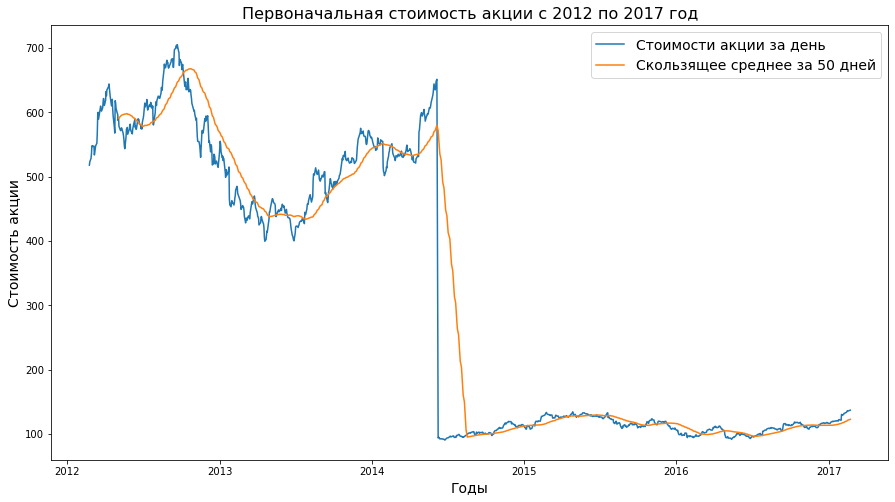

In [660]:
plt.figure(figsize = (15,8))
 
plt.plot(cost_rolling, label = 'Стоимости акции за день')
plt.plot(cost_rolling.rolling(window = 50).mean(), label = 'Скользящее среднее за 50 дней')
 
plt.legend(fontsize = 14)
 
plt.xlabel('Годы', fontsize = 14)
plt.ylabel('Стоимость акции', fontsize = 14)
plt.title('Первоначальная стоимость акции с 2012 по 2017 год', fontsize = 16)

plt.show()

### В целом, скользящее среднее сглаживает временные показатели.

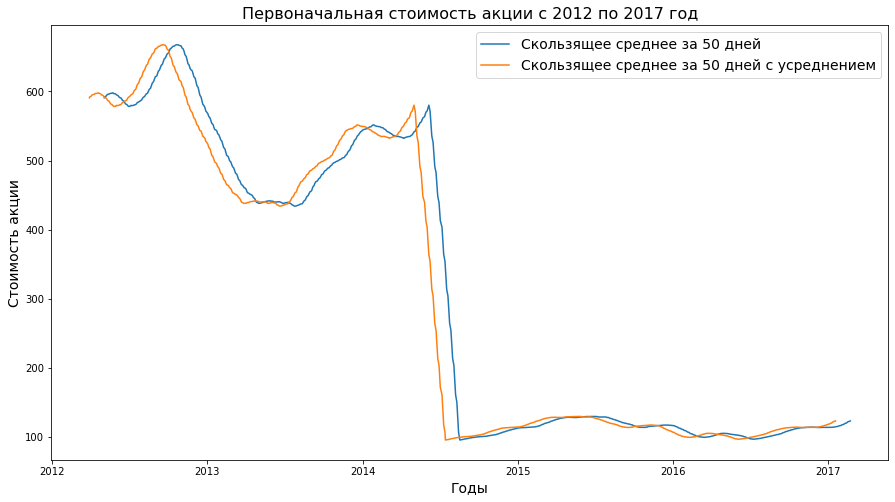

In [661]:
plt.figure(figsize = (15,8))

plt.plot(cost_rolling.rolling(window = 50).mean(), label = 'Скользящее среднее за 50 дней')
plt.plot(cost_rolling.rolling(window = 50, center=True).mean(), label = 'Скользящее среднее за 50 дней c усреднением')
 
plt.legend(fontsize = 14)

plt.xlabel('Годы', fontsize = 14)
plt.ylabel('Стоимость акции', fontsize = 14)
plt.title('Первоначальная стоимость акции с 2012 по 2017 год', fontsize = 16)

plt.show()

### Обычно этот тип графика используется для отслеживания тенденций в данных. По нашим данным наблюдается тренд: в 2014 начальная стоимость акции начинает резко падать. В анализе временных рядов часто приходится искать тренды.

## Дифференцирование временных рядов

### Если в данных есть какая-либо тенденция то, это не подходит для моделирования, прогнозирования. Тенденции могут приводить к изменению среднего значения во времени, а сезонность - к изменению дисперсии. Поэтому для повышения производительности модели или для наблюдения шума часто применяется дифференцирование временных рядов (здесь это разность между значениями).

In [662]:
cost_diff = cost[['Low', 'High']].diff()
cost_diff

,Low,High
Date,,
2012-02-23,NaN,NaN
2012-02-24,9.140023,5.069970
2012-02-27,-2.360001,5.600021
2012-02-28,9.569992,6.910011
2012-02-29,9.849999,12.200012
...,...,...
2017-02-15,1.369995,1.180008
2017-02-16,0.220001,-0.370010
2017-02-17,0.260010,-0.069992


### В качестве параметра функция diff принимает количество дней. По умолчанию разница составляла всего 1 день. Первая строка содержит нулевые значения, так как перед 2012-02-23 данных нет, а разница между “Высокой” и “Низкой” стоимостью за 2012–02–23 и 2012-02-24 числа записывается в строку, соответствующую последней дате: 2012–02–24.

In [663]:
cost_diff = cost[['High', 'Low']].diff(7)
cost_diff

,High,Low
Date,,
2012-02-23,NaN,NaN
2012-02-24,NaN,NaN
2012-02-27,NaN,NaN
2012-02-28,NaN,NaN
2012-02-29,NaN,NaN
...,...,...
2017-02-15,5.770004,5.720001
2017-02-16,3.809998,4.389999
2017-02-17,3.610001,3.880005


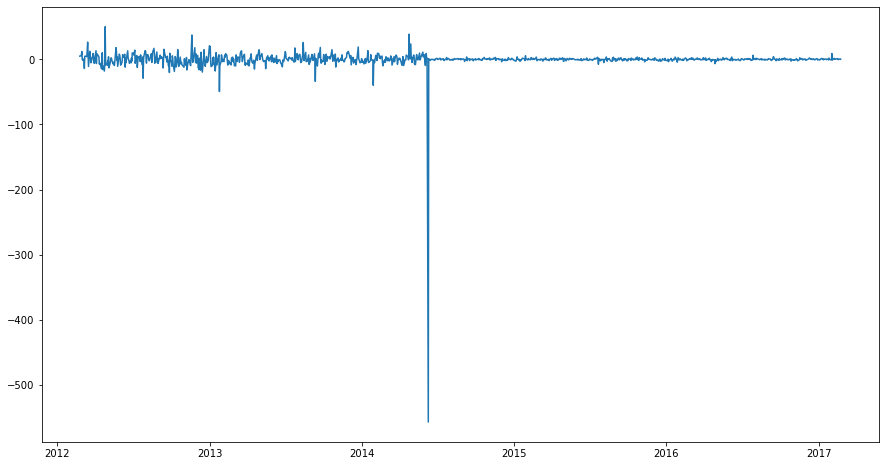

In [664]:
plt.figure(figsize = (15,8))

plt.plot(cost[['High']].diff())

plt.show()

## Извлечение временных характеристик

In [665]:
time = pd.DatetimeIndex(cost.index).month
time

Int64Index([2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=1258)

### Мы можем извлечь год, месяц, неделю или день недели из временного ряда, что может быть очень полезно. 

In [666]:
cost1 = pd.DataFrame(cost['Open'])
cost1['Weekday'] = pd.DatetimeIndex(cost1.index).to_series().dt.day_name()
cost1

,Open,Weekday
Date,,
2012-02-23,515.079987,Thursday
2012-02-24,519.669998,Friday
2012-02-27,521.309982,Monday
2012-02-28,527.960014,Tuesday
2012-02-29,541.560005,Wednesday
...,...,...
2017-02-15,135.520004,Wednesday
2017-02-16,135.669998,Thursday
2017-02-17,135.100006,Friday


Text(0, 0.5, 'Средняя начальная стоимость')

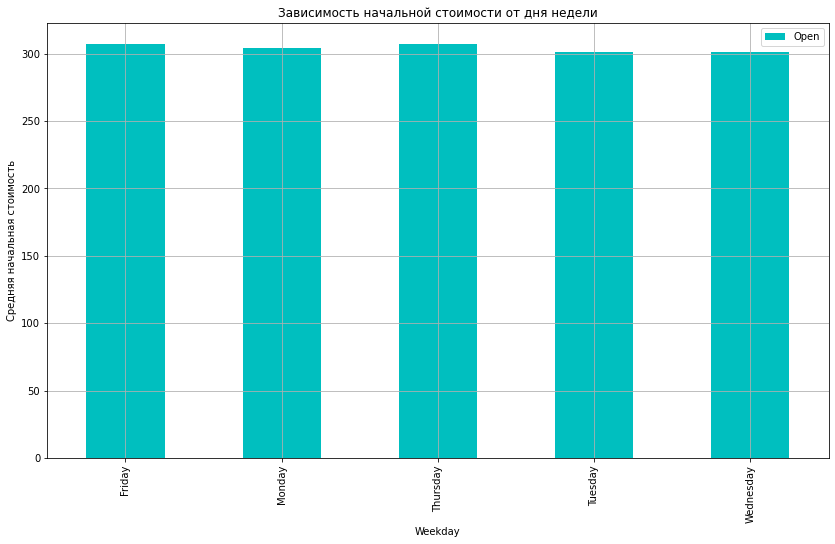

In [667]:
cost1 = cost1.groupby(['Weekday'])['Open'].mean().reset_index()

bar_plot = cost1.plot.bar(x='Weekday', y='Open', figsize=(14, 8), grid=True, color='c')

plt.title('Зависимость начальной стоимости от дня недели')
plt.ylabel('Средняя начальная стоимость')

In [668]:
cost1 = pd.DataFrame(cost['Open'])
cost1['Year'] = pd.DatetimeIndex(cost1.index).year
cost1

,Open,Year
Date,,
2012-02-23,515.079987,2012
2012-02-24,519.669998,2012
2012-02-27,521.309982,2012
2012-02-28,527.960014,2012
2012-02-29,541.560005,2012
...,...,...
2017-02-15,135.520004,2017
2017-02-16,135.669998,2017
2017-02-17,135.100006,2017


Text(0, 0.5, 'Средняя начальная стоимость')

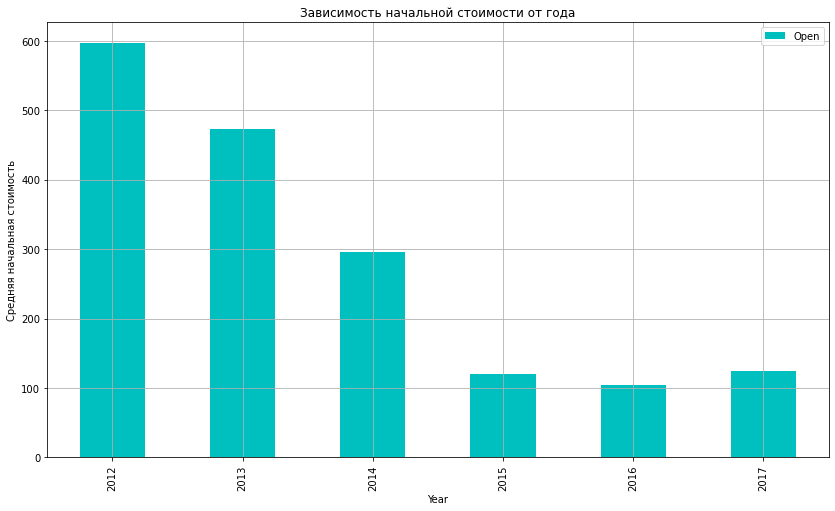

In [669]:
cost1 = cost1.groupby(['Year'])['Open'].mean().reset_index()

bar_plot = cost1.plot.bar(x='Year', y='Open', figsize=(14, 8), grid=True, color='c')

plt.title('Зависимость начальной стоимости от года')
plt.ylabel('Средняя начальная стоимость')

### Можно сделать вывод, что день недели влияет на данные, также как и год.


## Моделирование и построение прогноза

### Экспоненциальное сглаживание

### Логично предположить, что недавние наблюдения более важны для прогноза, чем более отдаленные. Кроме того, мы можем взять все, а не некоторые из имеющихся у нас наблюдений.

### В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего мы как раз  берем все предыдущие значения и задаем каждому из наблюдений определенный вес и (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.



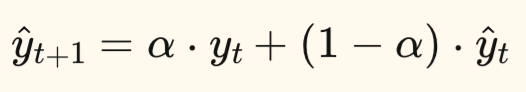

In [670]:
display(Image(filename='Экспоненциальное сглаживание.png', width = 1000))

#### где ŷt+1 — это прогнозное значение, yt — истинное значение в текущий период, ŷt — прогнозное значение в текущий период. Как мы видим, прогнозное значение зависит как от истинного, так и от прогнозного значений. Важность этих значений определяется параметром альфа, который варьируется от 0 до 1. Чем альфа больше, тем больший вес у истинного наблюдения. Формула рекурсивна, т.е. каждый раз мы умножаем (1 – α) на очередное прогнозное значение и так до конца временного ряда.

In [671]:
cost.Open.head(5).reset_index()

,Date,Open
0,2012-02-23,515.079987
1,2012-02-24,519.669998
2,2012-02-27,521.309982
3,2012-02-28,527.960014
4,2012-02-29,541.560005


In [672]:
alpha = 0.2
 

exp_smoothing = [cost['Open'][0]]
 
for i in range(1, len(cost['Open'])):
    exp_smoothing.append(alpha * cost['Open'][i - 1] + (1 - alpha) * exp_smoothing[i - 1])

exp_smoothing[-1]

133.5761940694782

In [673]:
len(cost), len(exp_smoothing)

(1258, 1258)

### Для временного ряда, состоящего из 365 наблюдений, мы получим 365 прогнозных значений (вплоть до 1 января 1960 года включительно).

In [674]:
cost['Exp_smoothing'] = exp_smoothing
cost.head(8)

,Open,High,Low,Close,Exp_smoothing
Date,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,515.079987
2012-02-24,519.669998,522.899979,518.640015,522.409981,515.079987
2012-02-27,521.309982,528.500000,516.280014,525.760017,515.997989
2012-02-28,527.960014,535.410011,525.850006,535.410011,517.060388
2012-02-29,541.560005,547.610023,535.700005,542.440025,519.240313
2012-03-01,548.169983,548.209984,538.769981,544.469978,523.704251
2012-03-02,544.240013,546.800018,542.519974,545.180008,528.597398
2012-03-05,545.420013,547.479980,526.000023,533.160027,531.725921


### Единственный нюанс, так как фактические значения описывают период с 12 февраля 2012 года, а прогнозные со 24 февраля 2012 года , мы не можем просто их соединить. Столбец Exp_smoothing  нужно сдвинуть на один день вперед.

In [675]:
from datetime import timedelta
 
last_date = cost.iloc[[-1]].index
 
last_date = last_date + timedelta(days = 1)
 
cost = cost.append(pd.DataFrame(index = last_date))
 
cost.tail()

,Open,High,Low,Close,Exp_smoothing
Date,,,,,
2017-02-16,135.669998,135.899994,134.839996,135.350006,131.539910
2017-02-17,135.100006,135.830002,135.100006,135.720001,132.365928
2017-02-21,136.229996,136.750000,135.979996,136.699997,132.912744
2017-02-22,136.429993,137.119995,136.110001,137.110001,133.576194
2017-02-23,NaN,NaN,NaN,NaN,NaN


In [676]:
cost['Exp_smoothing'] = cost['Exp_smoothing'].shift(1)
cost

,Open,High,Low,Close,Exp_smoothing
Date,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,NaN
2012-02-24,519.669998,522.899979,518.640015,522.409981,515.079987
2012-02-27,521.309982,528.500000,516.280014,525.760017,515.079987
2012-02-28,527.960014,535.410011,525.850006,535.410011,515.997989
2012-02-29,541.560005,547.610023,535.700005,542.440025,517.060388
...,...,...,...,...,...
2017-02-16,135.669998,135.899994,134.839996,135.350006,130.544887
2017-02-17,135.100006,135.830002,135.100006,135.720001,131.539910
2017-02-21,136.229996,136.750000,135.979996,136.699997,132.365928


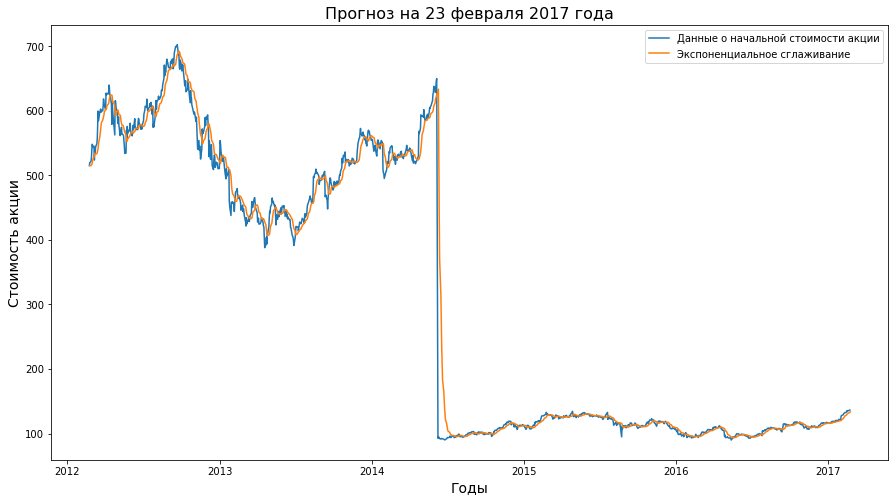

In [677]:
plt.figure(figsize = (15,8))
 

plt.plot(cost['Open'], label = 'Данные о начальной стоимости акции')
plt.plot(cost['Exp_smoothing'], label = 'Экспоненциальное сглаживание')
 
plt.legend()
 
plt.ylabel('Стоимость акции', fontsize = 14)
plt.xlabel('Годы', fontsize = 14)
plt.title('Прогноз на 23 февраля 2017 года', fontsize = 16)
 
plt.show()

### Модель экспоненциального сглаживания можно усложнить, кроме того, усложненные модели способны предсказывать более одного значения (здесь мы смогли сделать прогноз лишь на один день вперёд).

